# Simple notebook
This notebook is just to test that the installation works fine

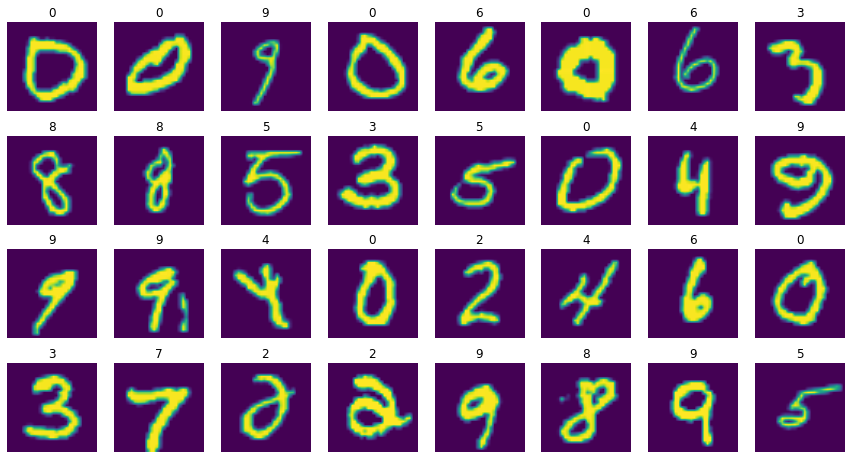

In [7]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
  

batch_size = 32

transform_train = transforms.Compose([
    transforms.ToTensor()
])

transform_test = transforms.Compose([
    transforms.ToTensor()
])


# datasets (MNIST)
mnist_train = datasets.MNIST('/data', train=True, download=True, transform=transform_train)
mnist_test = datasets.MNIST('/data', train=False, download=True, transform=transform_test)

# dataloaders
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, pin_memory=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, pin_memory=True)


def visualize_batch(batch, labels, ncols=8):
    nrows = (batch.shape[0] + ncols - 1) // ncols
    plt.figure(figsize=(15, 2*nrows))
    for i in range(batch.shape[0]):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(batch[i].permute(1, 2, 0).squeeze(), interpolation='bilinear')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()


batch, labels = next(iter(train_loader))
visualize_batch(batch, [str(int(lbl)) for lbl in labels])